# Classification Project: Exploring Patients Data to Predict Sepsis

![Sepsis Technology Image](https://img.hcinnovationgroup.com/files/base/ebm/hci/image/2021/06/sepsis_tech.60d4da84d62da.png?auto=format,compress&fit=fill&fill=blur&w=1200&h=630)

# Introduction (What is Sepssis?)

## What is Sepsis?

 

Sepsis is a severe and potentially life-threatening condition that occurs when the body's response to an infection triggers widespread inflammation. It is often referred to as blood poisoning.

 

Sepsis can develop when the immune system releases chemicals into the bloodstream to combat an infection but instead causes widespread inflammation throughout the body. 
The aim of this project is to explore the various factors that can cause sepsis in order to predict the occurence of sepsis.

 

Predicting sepsis is important because early recognition and intervention can significantly improve patient outcomes. Sepsis can progress rapidly and become life-threatening within a short period. By identifying patients who are at risk of developing sepsis, healthcare providers can initiate timely treatment and interventions to prevent the condition from worsening.

# Importation

In [37]:
# Data handling
import pandas as pd
import numpy as np
import threadpoolctl
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )

# Statistics
from scipy import stats
from scipy.stats import shapiro, trim_mean, mstats, mode

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from collections import Counter

# balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from statistics import stdev
from sklearn.model_selection import KFold

# Other packages
import os, pickle

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [38]:
url = 'https://raw.githubusercontent.com/ikoghoemmanuell/Machine-Learning-API-using-FastAPI/main/Paitients_Files_Train.csv'
data = pd.read_csv(url)

url2 = 'https://raw.githubusercontent.com/ikoghoemmanuell/Machine-Learning-API-using-FastAPI/main/Paitients_Files_Test.csv'
test = pd.read_csv(url2)

# Exploratory Data Analysis: EDA

## Hypothesis

H0: Age does not determine whether a patient will develop Sepsis

H1: Age influences whether a patient will develop Sepsis

## Questions

1. What is the distribution of sepsis cases in the dataset? 
2. How does plasma glucose level relate to the incidence of sepsis?
3. Are there any significant differences in blood pressure between patients who develop sepsis and those who do not?
4. Is there a relationship between the length of ICU stay and the likelihood of developing sepsis?
5. Are there any outliers in the dataset, and how do they affect the analysis?
6. Is there a significant difference in the age distribution between patients who develop sepsis and those who do not?

## Dataset overview

In [39]:
data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [40]:
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [41]:
data.shape

(599, 11)

In [42]:
# summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [43]:
data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [44]:
data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Issues with the data

1. Too many zeros in each column
2. The column names are not very descriptive.
3. The target variable 'Sepssis' may have imbalanced classes.
4. There may be outliers in some of the numerical columns.
5. There could be correlations between some of the predictor variables, leading to multicollinearity.

## How I Intend to Solve Them

1. Replace zeros in each column with the median value
2. Rename the column names to be more descriptive and easier to understand.
3. Handle the imbalanced classes in the target variable using techniques such as undersampling or oversampling.
4. Use visualization techniques such as box plots and scatter plots to identify and handle any outliers.
5. Use correlation analysis to identify highly correlated variables and consider dropping or transforming them.

In [45]:
data.columns.values

array(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age',
       'Insurance', 'Sepssis'], dtype=object)

In [46]:
# Rename the columns
data = data.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_Result_1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_Result_2",
    "TS": "Blood_Work_Result_3",
    "M11": "BMI",
    "BD2": "Blood_Work_Result_4",
    "Age": "Patient_age",
    "Sepssis": "Target"
})

In [47]:
# import matplotlib.pyplot as plt

# # Create the subplots
# fig, axes = plt.subplots(len(outlier_features), 1, figsize=(10, len(outlier_features)*5))

# # Iterate over each column and create a boxplot in the corresponding subplot
# for i, col in enumerate(outlier_features):
#     ax = axes[i]
#     sns.boxplot(x=data_copy[col], ax=ax)
#     ax.set_title(col)

# # Adjust the layout and spacing
# plt.tight_layout()

# # Show the plots
# plt.show()


<AxesSubplot:xlabel='Plasma_glucose'>

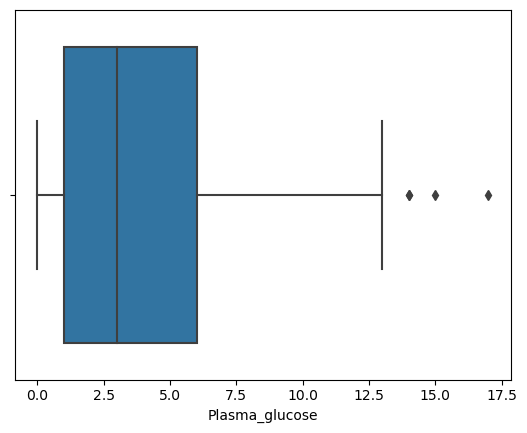

In [48]:
# Handle outliers in numerical columns
sns.boxplot(x=data['Plasma_glucose'])

<AxesSubplot:xlabel='Blood_Pressure'>

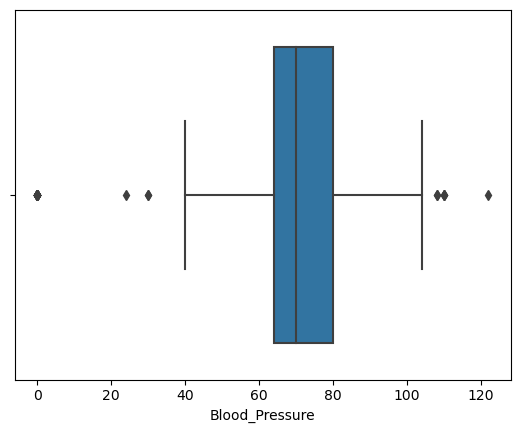

In [49]:
sns.boxplot(x=data['Blood_Pressure'])

<AxesSubplot:xlabel='BMI'>

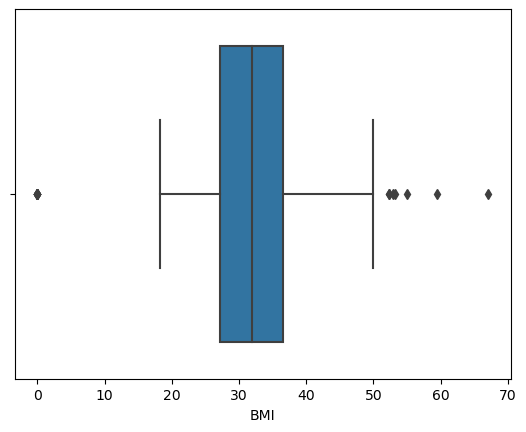

In [50]:
sns.boxplot(x=data['BMI'])

In [51]:
data.describe()

,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,BMI,Blood_Work_Result_4,Patient_age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


we don't need the ID column, so we drop it

In [52]:
data.drop('ID', axis=1, inplace=True)

In [53]:
# Separate the the numerical columns
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
categoric_features = data.select_dtypes(include=['object']).columns.tolist()

In [54]:
# compare the total count for each column with the count of zeros
for col in numerical_features:
    zeros_count = (data[col] == 0).sum()
    total_count = data[col].count()
    print(f"Total count: {total_count}, Zeros_count: {zeros_count} Column: {col}")

Total count: 599, Zeros_count: 93 Column: Plasma_glucose
Total count: 599, Zeros_count: 5 Column: Blood_Work_Result_1
Total count: 599, Zeros_count: 28 Column: Blood_Pressure
Total count: 599, Zeros_count: 175 Column: Blood_Work_Result_2
Total count: 599, Zeros_count: 289 Column: Blood_Work_Result_3
Total count: 599, Zeros_count: 9 Column: BMI
Total count: 599, Zeros_count: 0 Column: Blood_Work_Result_4
Total count: 599, Zeros_count: 0 Column: Patient_age
Total count: 599, Zeros_count: 188 Column: Insurance


Plasma_glucose: Since there are 93 zeros out of 599 total counts, it seems unlikely for glucose levels to be zero. Let's these zeros as missing values and replace with the median

Blood_Work_Result_1: With only 5 zeros out of 599 total counts, it might be reasonable to keep these values as they are, assuming that zero is a valid and meaningful value for this column in your dataset.

Blood_Pressure: Similar to Blood_Work_Result_1, 28 zeros out of 599 total counts are relatively small. You can choose to keep these values if zero is a valid possibility for blood pressure readings in your dataset.

Blood_Work_Result_2: Having 175 zeros out of 599 total counts indicates a significant portion of the data with zero values. Let's these zeros as missing values and replace with the median

Blood_Work_Result_3: With 289 zeros out of 599 total counts, it seems like a large portion of the data has zero values. Similar to Blood_Work_Result_2, you can treat these zeros as missing values and replace with the median

BMI: Since there are only 9 zeros out of 599 total counts, it might be reasonable to keep these values as they are, assuming that zero is a valid and meaningful value for BMI in your dataset.

In [55]:
# Replace zeros in each column with the median value
columns_with_too_many_zeros = ['Plasma_glucose', 'Blood_Work_Result_2', 'Blood_Work_Result_3']
for col in columns_with_too_many_zeros:
    data[col].replace(to_replace=0, value=data[col].median(), inplace=True)

In [56]:
data.describe()

,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,BMI,Blood_Work_Result_4,Patient_age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,4.290484,120.153589,68.732888,27.282137,96.829716,31.920033,0.481187,33.290484,0.686144
std,2.987000,32.682364,19.335675,9.451984,105.589923,8.008227,0.337552,11.828446,0.464447
min,1.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,23.000000,36.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The results above showed there are many outliers

To deal with outliers in the dataset, we can use various techniques such as:

Winsorization: replace the extreme values with the nearest non-outlier value.
Trimming: remove the extreme values from the dataset.
Transformation: apply mathematical transformations such as logarithm or square root to the data to make the distribution more symmetric.

In [57]:
# drop Insurance from numerical_features since it has no outliers
outlier_features = [col for col in numerical_features if col != 'Insurance']

for col in outlier_features:
    # Perform Shapiro-Wilk test
    stat, p = shapiro(data[col])
    
    # Print the result
    if p > 0.05:
        print(f"{col} is normally distributed (p-value={p})")
    else:
        print(f"{col} is not normally distributed (p-value={p})")

Plasma_glucose is not normally distributed (p-value=4.3931711774501185e-21)
Blood_Work_Result_1 is not normally distributed (p-value=6.196759771981419e-10)
Blood_Pressure is not normally distributed (p-value=6.96457251679641e-26)
Blood_Work_Result_2 is not normally distributed (p-value=2.564007402032404e-18)
Blood_Work_Result_3 is not normally distributed (p-value=1.4404240533682491e-33)
BMI is not normally distributed (p-value=2.1643669116059444e-13)
Blood_Work_Result_4 is not normally distributed (p-value=1.4773411337972998e-24)
Patient_age is not normally distributed (p-value=1.0750616611191123e-21)


In [58]:
# Check for outliers by applying the IQR method checking
df = data[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()


Plasma_glucose          True
Blood_Work_Result_1     True
Blood_Pressure          True
Blood_Work_Result_2     True
Blood_Work_Result_3     True
BMI                     True
Blood_Work_Result_4     True
Patient_age             True
Insurance              False
dtype: bool

we cannot use winsorization since the data is not normally distributed


In [59]:
# from sklearn.impute import SimpleImputer

# # Define the threshold for identifying outliers
# outlier_threshold = 2

# # Create a copy of the original data
# data_copy = data.copy()

# # numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# # Iterate over each numeric column
# for col in outlier_features:
#     # Calculate the median of the column
#     col_median = data[col].median()

#     # Identify the outliers based on the threshold
#     outliers = data[col] > outlier_threshold

#     # Replace the outliers with NaN values
#     data_copy.loc[outliers, col] = np.nan

# # Create an instance of the SimpleImputer with median strategy
# imputer = SimpleImputer(strategy='median', missing_values = np.NaN)

In [60]:
# Create a copy of the original data frame to preserve the original data
data_copy = data.copy()

# Iterate over the outlier features and replace outliers with the median
for col in outlier_features:
    # create outlier replacing function
    def replace_outlier_with_median():
        # Calculate the median for the current column
        median = data_copy[col].median()
        
        # Find the lower and upper bounds for outliers
        lower_bound = data_copy[col].quantile(0.25) - 1.5 * (data_copy[col].quantile(0.75) - data_copy[col].quantile(0.25))
        upper_bound = data_copy[col].quantile(0.75) + 1.5 * (data_copy[col].quantile(0.75) - data_copy[col].quantile(0.25))
        
        # Replace outliers with the median
        data_copy.loc[(data_copy[col] < lower_bound) | (data_copy[col] > upper_bound), col] = median
    # call the function to replace outliers in each column
    replace_outlier_with_median()

In [61]:
# Iterate over the outlier features and replace outliers with the median
for col in outlier_features:
  if col != 'Plasma_glucose' and col != 'Blood_Work_Result_1':
    replace_outlier_with_median()

In [62]:
# Iterate over the outlier features and replace outliers with the median
for col in outlier_features:
  if col != 'Plasma_glucose' and col != 'Blood_Work_Result_1' and col != 'Blood_Work_Result_2':
    replace_outlier_with_median()

In [63]:
# Iterate over the outlier features and replace outliers with the median
for col in ['Blood_Pressure', 'Blood_Work_Result_3']:
    replace_outlier_with_median()

In [64]:
# # Define the threshold for identifying outliers
# outlier_threshold = 2

# # Iterate over each numeric column
# for col in outlier_features:
#     # Calculate the mode of the column
#     col_median = data[col].median()
    
#     # Identify the outliers based on the threshold
#     outliers = data[col] > outlier_threshold
    
#     # Replace the outliers with the mode value
#     data.loc[outliers, col] = col_median

In [65]:
# # Specify the proportion of data to trim from each end (e.g. 3%)
# trim_pct = 0.1

# # Convert the DataFrame to a NumPy array
# data_array = data[outlier_features].to_numpy()

# # Apply Winsorization to replace outliers with the mean or median
# trimmed_data = mstats.winsorize(data_array, limits=trim_pct)

# # Convert the trimmed_data back to a DataFrame
# trimmed_df = pd.DataFrame(trimmed_data, columns=data[outlier_features].columns)

# # Replace the numerical variables in the original data with the trimmed data
# data[outlier_features] = trimmed_df[outlier_features]

# # Print the replaced values
# print(data)

In [66]:
# # Trim the data using the trim_mean function from scipy.stats
# trimmed_data = data[outlier_features].apply(lambda x: trim_mean(x, trim_pct), axis=0)

# # replace the numerical features with trimmed data
# data[outlier_features] = trimmed_data[outlier_features]

In [67]:
# # Specify the proportion of data to trim from each end (e.g. 5%)
# trim_pct = 0.03

# # Trim the data using the trim_mean function from scipy.stats
# trimmed_data = df.apply(lambda x: trim_mean(x, trim_pct), axis=0)

# # Compare the trimmed and untrimmed means
# print(f"Untrimmed mean: {data.mean()}")
# print(f"Trimmed mean: {trimmed_data}")

In [68]:
df = data_copy[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()

Plasma_glucose         False
Blood_Work_Result_1    False
Blood_Pressure         False
Blood_Work_Result_2    False
Blood_Work_Result_3    False
BMI                    False
Blood_Work_Result_4    False
Patient_age            False
Insurance              False
dtype: bool

In [70]:
data = data_copy

<AxesSubplot:>

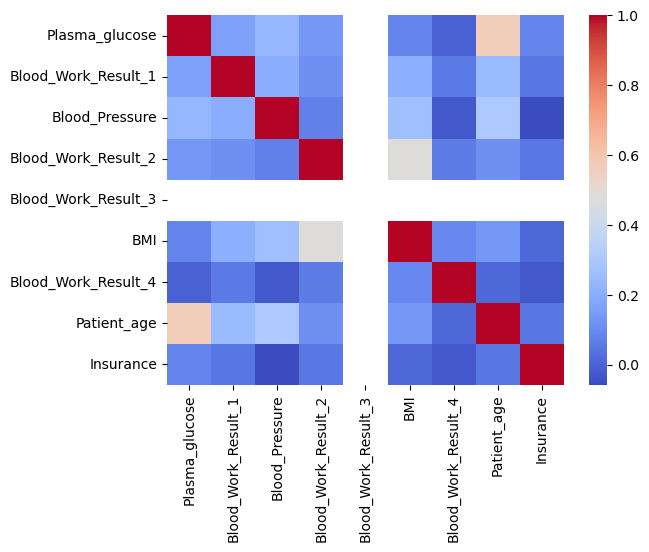

In [71]:
# Check for multicollinearity between predictor variables
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm')

In [69]:
bbbbb

NameError: name 'bbbbb' is not defined

In [72]:
# Print the pairs with correlation higher than 0.4999 or less than -0.4999, excluding correlation of 1
for col1 in corr.columns:
    for col2 in corr.columns:
        correlation = corr.loc[col1, col2]
        if (correlation > 0.4999 or correlation < -0.4999) and correlation != 1:
            print(f"{col1} - {col2}: {correlation}")

Plasma_glucose - Patient_age: 0.5688600451945021
Patient_age - Plasma_glucose: 0.5688600451945021


plasma glucose and patient age have high positive correlation

from my research, correlation between plasma glucose and patient age is usually low or moderate

Instead of removing one of the columns, we'll create a new feature that combines information from both columns

## Drop Duplicates

In [ ]:
data.duplicated().sum()

0

## Impute Missing Values

In [ ]:
data.isnull().sum()

Plasma_glucose         0
Blood_Work_Result_1    0
Blood_Pressure         0
Blood_Work_Result_2    0
Blood_Work_Result_3    0
BMI                    0
Blood_Work_Result_4    0
Patient_age            0
Target                 0
dtype: int64

## Univariate Analysis

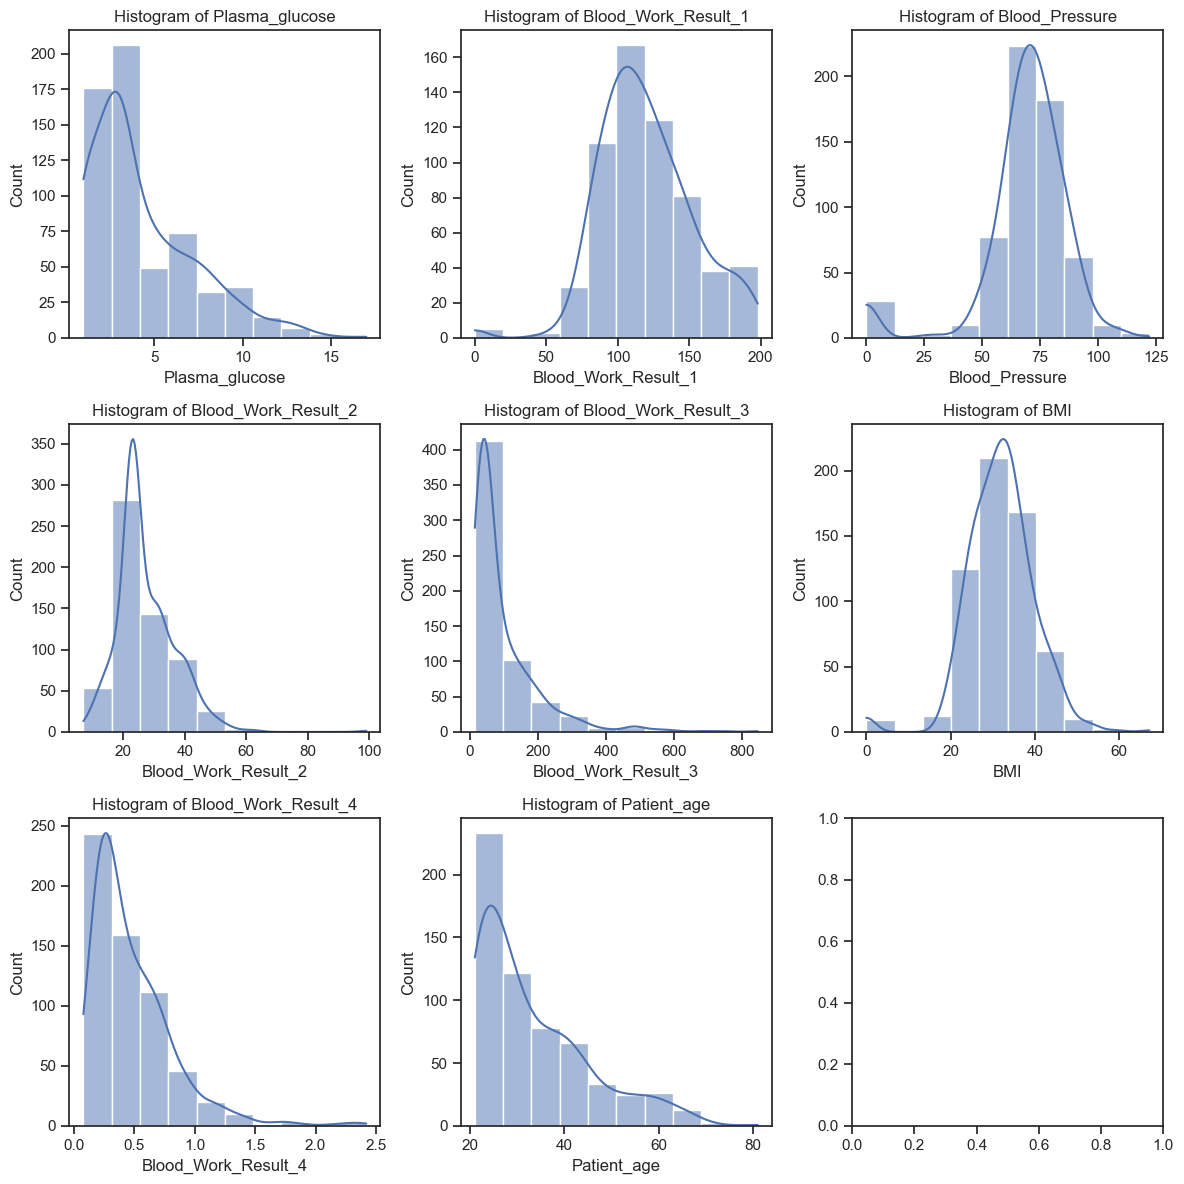

In [ ]:
# Set the style for the plot
sns.set(style="ticks", color_codes=True)

# Create a grid of 3 by 3 subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_features):
    sns.histplot(data=data, x=col, kde=True, bins=10, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Multivariate Analysis

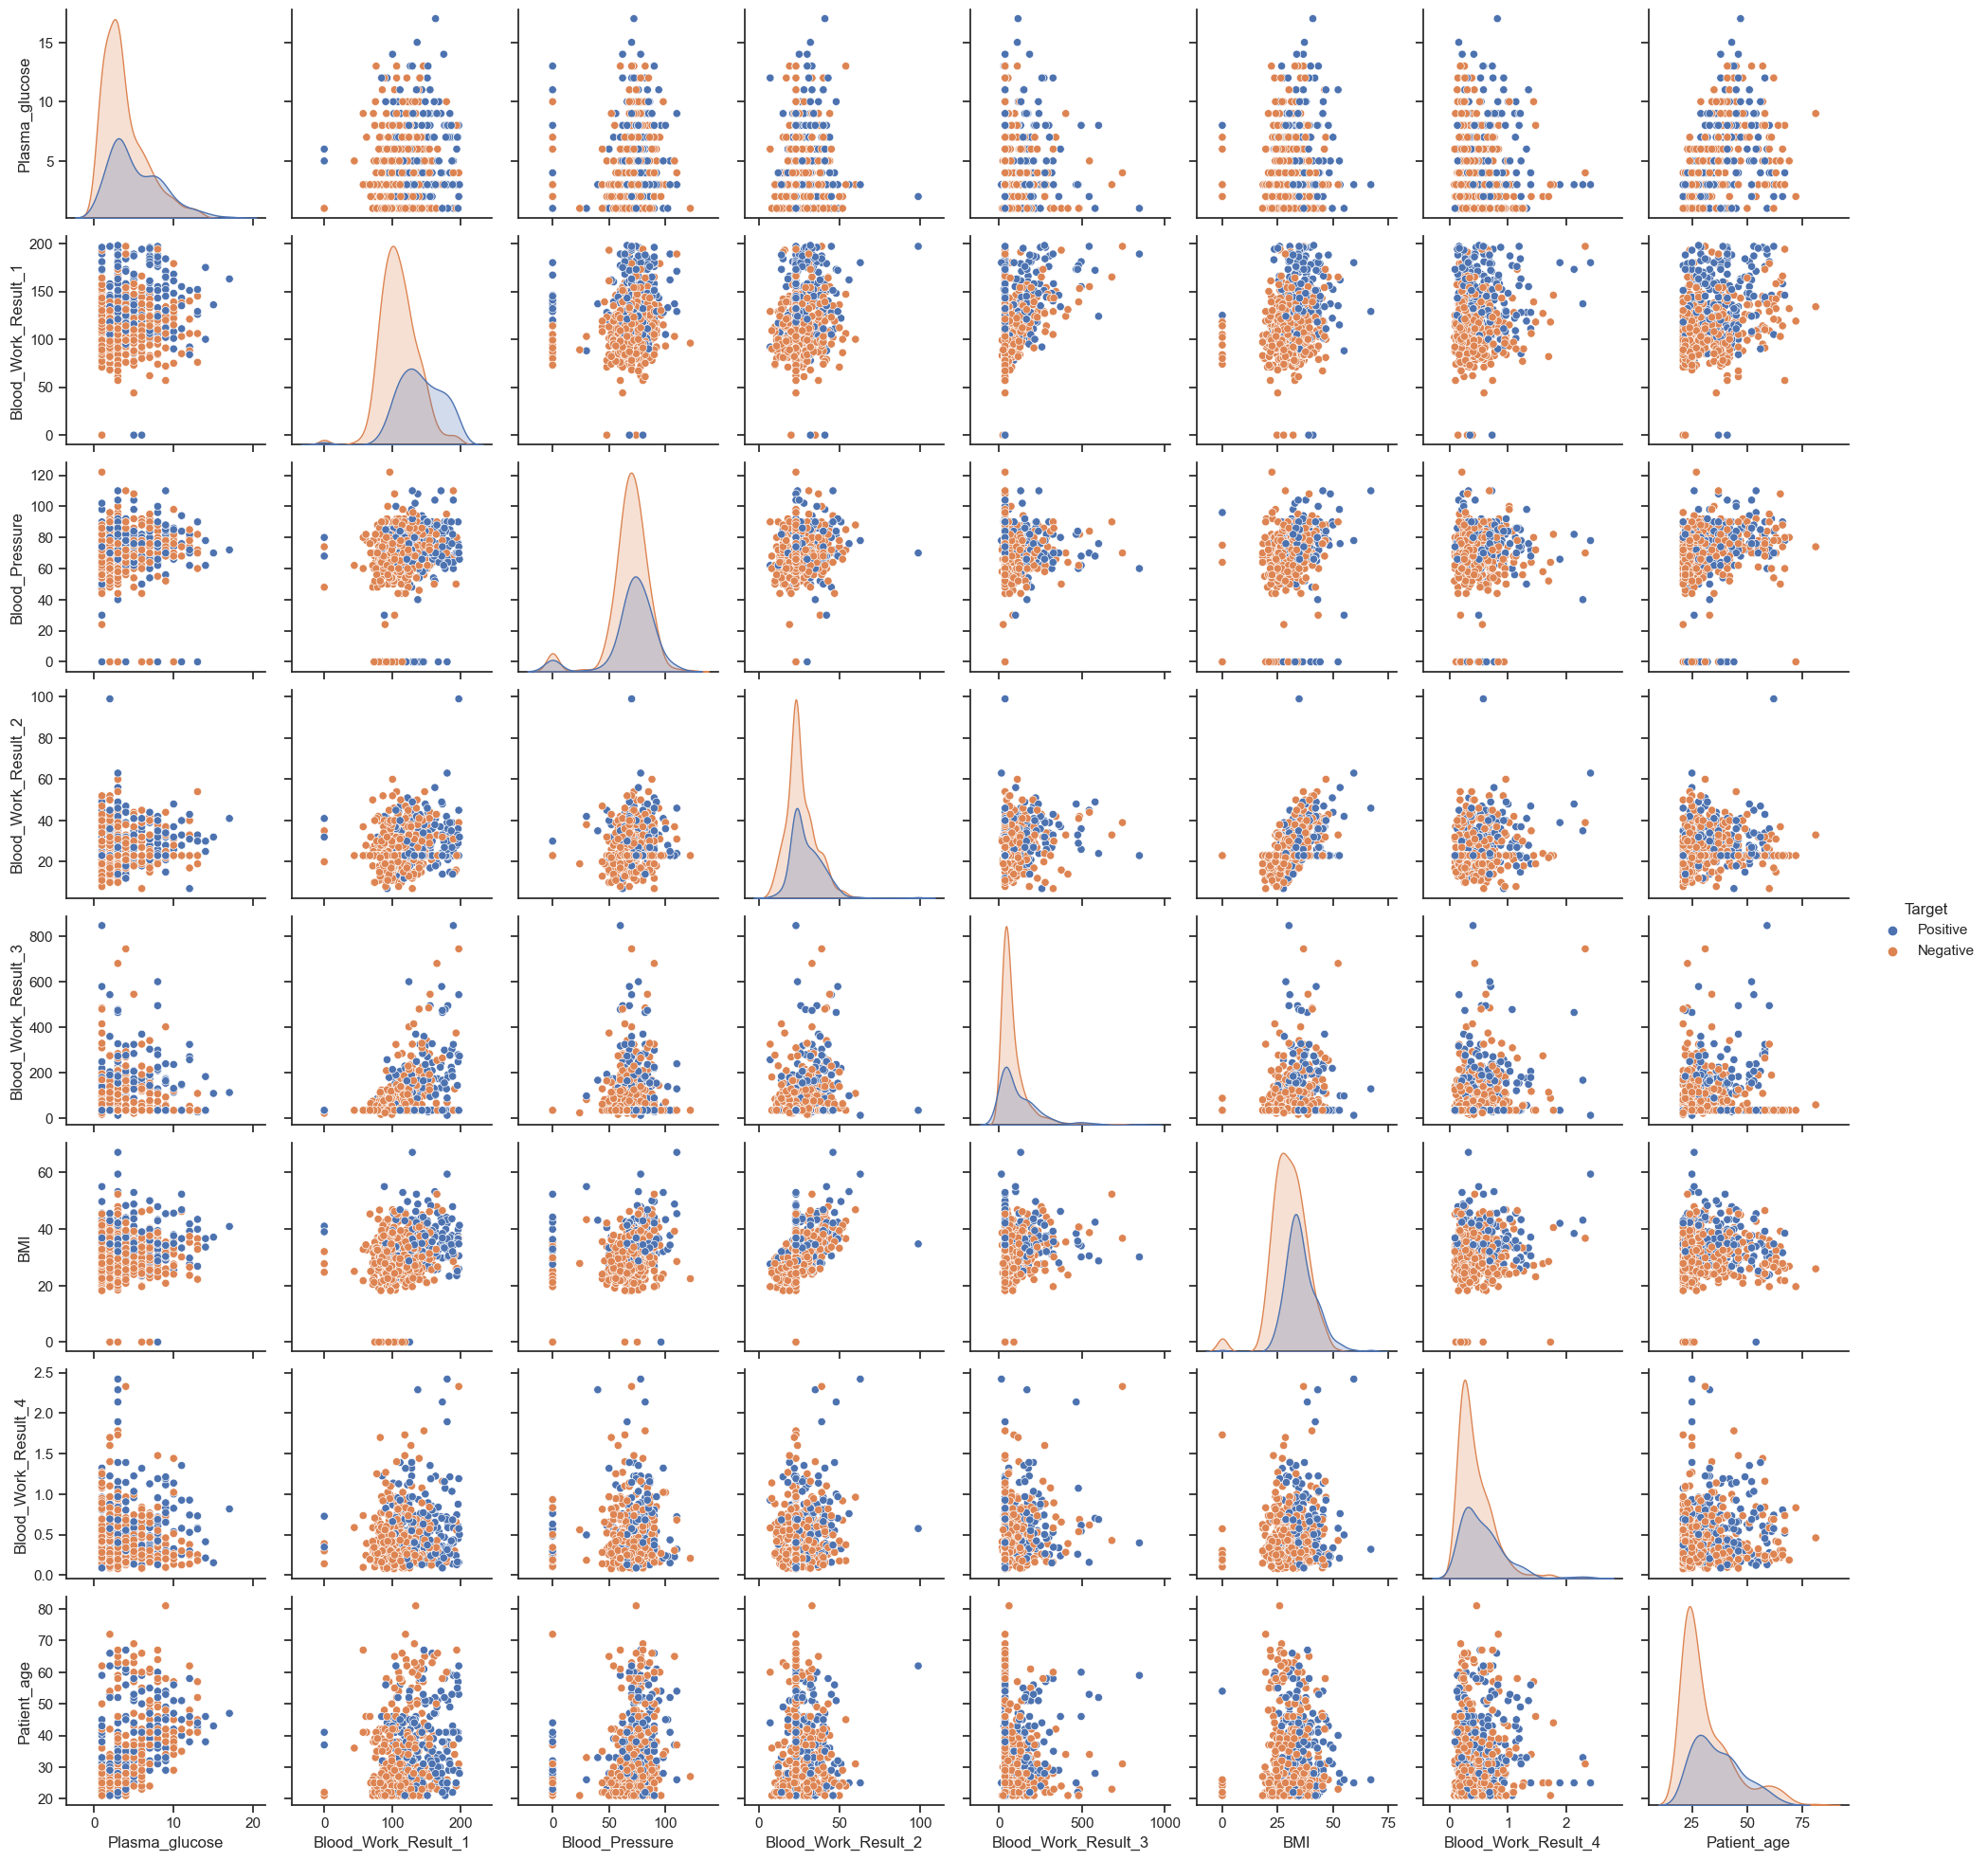

In [ ]:
sns.pairplot(data, vars=numerical_features, hue='Target')
plt.show()

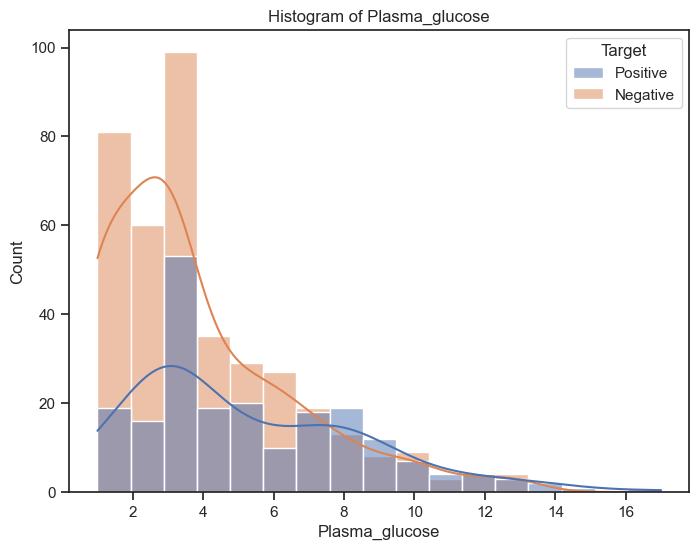

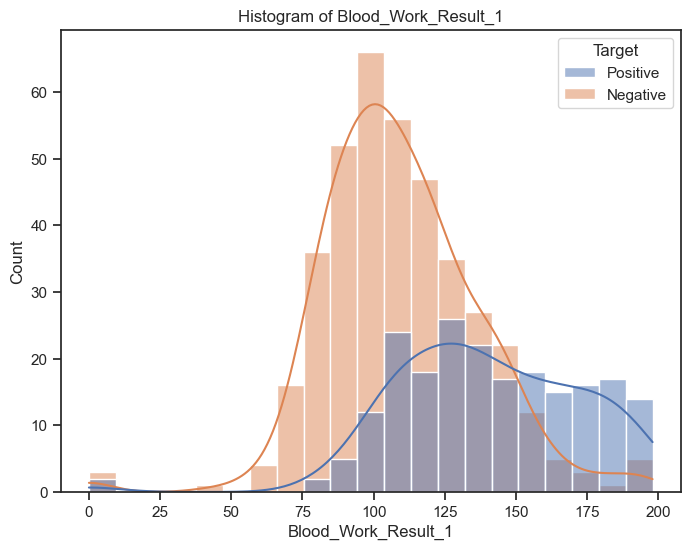

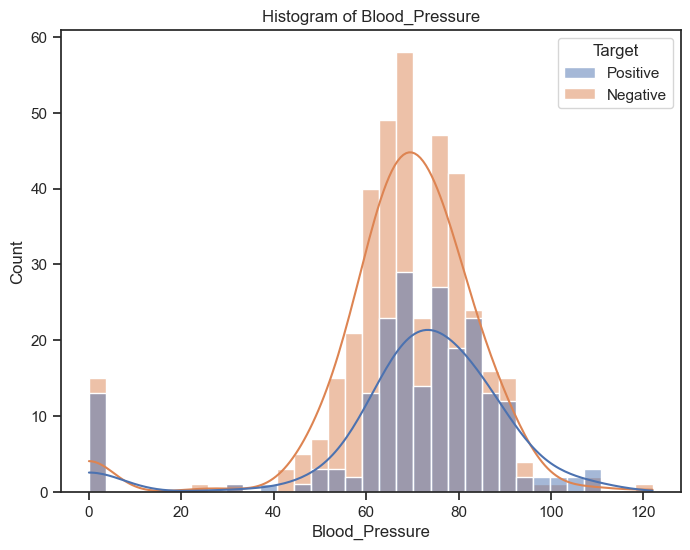

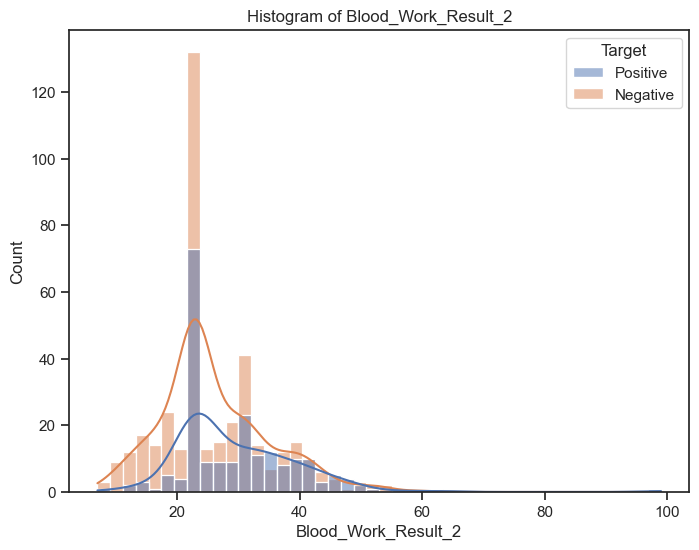

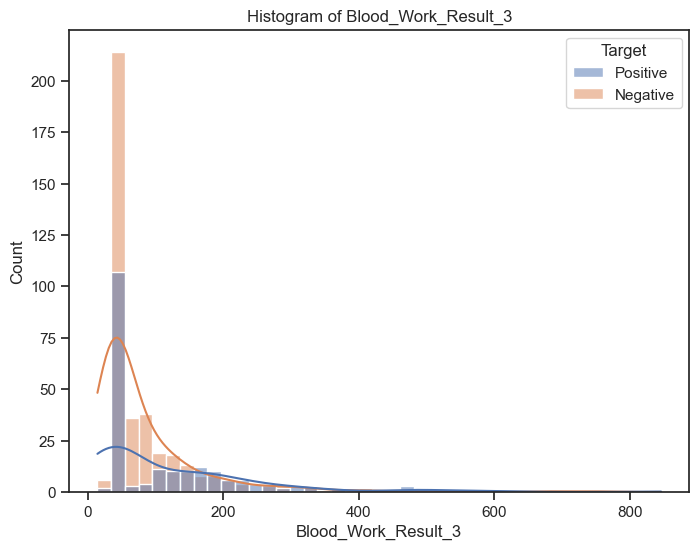

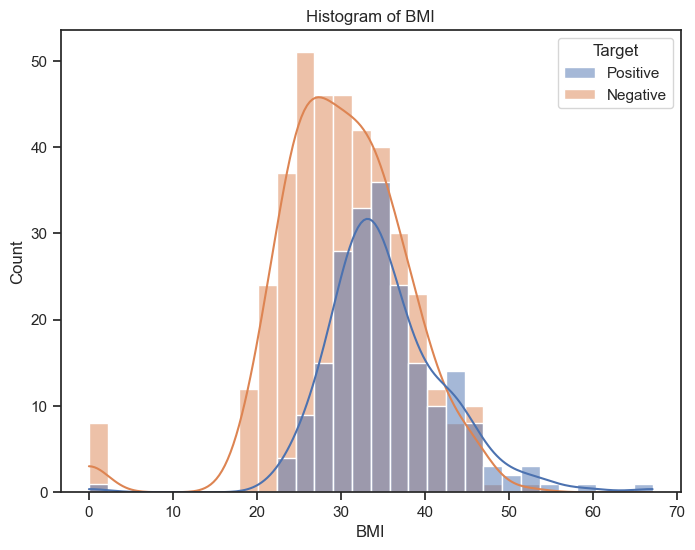

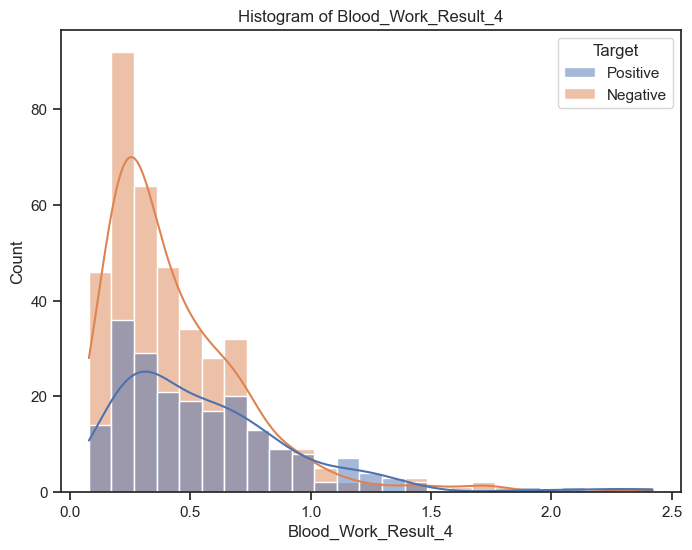

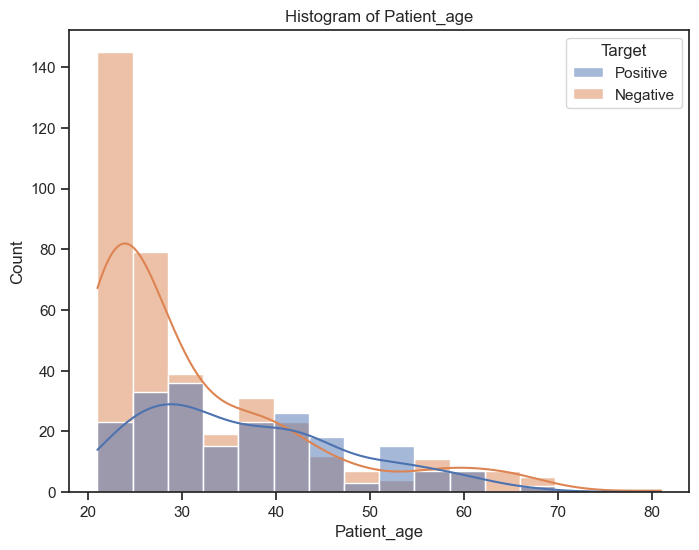

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, hue='Target', alpha=0.5, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


## Hypothesis validation

H0: Age does not determine whether a patient will develop Sepsis

H1: Age influences whether a patient will develop Sepsis

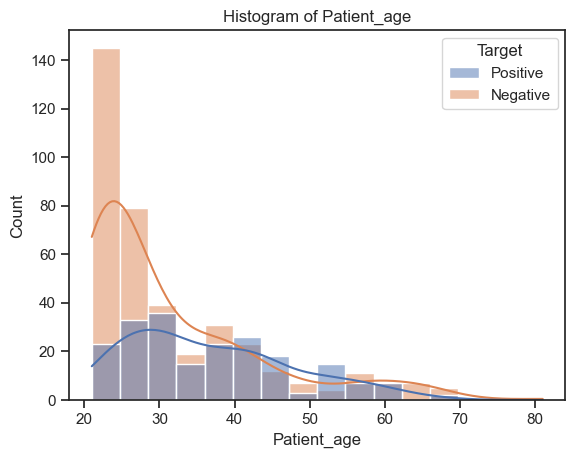

In [ ]:
sns.histplot(data=data, x='Patient_age', hue='Target', alpha=0.5, kde=True)
plt.title(f'Histogram of Patient_age')
plt.xlabel('Patient_age')
plt.ylabel('Count')
plt.show()

Patients between ages 40 to 60 have tested positive to sepsis from the above plot

Null Hypothesis Rejected!

## Anwering Questions

## 1. Does longer tenure increase churn?
customers with longer tenure have less churn rate.

# Feature Processing & Engineering

## Creating new features

In [ ]:
# Calculate the ratio between "Plasma_glucose" and "Patient_age"
# data['glucose_age_ratio'] = data['Plasma_glucose'] / data['Patient_age']

In [ ]:
drop the original features
# data.drop(columns=['Plasma_glucose', 'Patient_age'], axis=1, inplace=True)

SyntaxError: invalid syntax (2799240777.py, line 1)

# Features Encoding

In [ ]:
le = LabelEncoder()
df=data
df[['Target']] = df[['Target']].apply(le.fit_transform) # Applying LabelEncoder to 'Target' column

X = df.drop('Target', axis=1)
y = df['Target']

## Data Imbalance Check

<AxesSubplot:xlabel='Target', ylabel='count'>

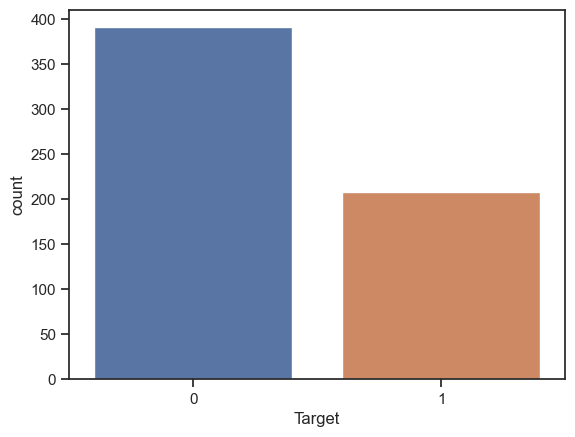

In [ ]:
# Handle imbalanced classes in the target variable
sns.countplot(x='Target', data=data)

Dataset is imbalanced so we can't use Accuracy Score to choose our model

what to do to solve this issue:

1. We could use stratified splitting during train-test split (split the dataset in a way that preserves the same proportions of examples in each class.)
2. We could be extra careful when dealing with outliers (we can delete meaningull information).
3. Resampling Techniques — Oversample minority class or Undersample majority class.

In [ ]:
#Oversampling the minority class (the churn customers)
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

After Random Over Sampling Of Minor Class Total Samples are : 782
Original dataset shape Counter({0: 391, 1: 208})
Resampled dataset shape Counter({1: 391, 0: 391})


Now our data is balanced

# Dataset Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((625, 8), (157, 8), (625,), (157,))

# Features Encoding

In [ ]:
# Create both numerical and categorical columns
columns = list(df.columns)

categoric_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()


numeric_columns.remove('Target') # Excluding 'Churn'

In [ ]:
print(df.columns)

Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'BMI',
       'Blood_Work_Result_4', 'Patient_age', 'Target'],
      dtype='object')


In [ ]:
print(categoric_columns)
print(numeric_columns)

[]
['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure', 'Blood_Work_Result_2', 'Blood_Work_Result_3', 'BMI', 'Blood_Work_Result_4', 'Patient_age']


Let's use OneHotEncoder to encode the categorical columns except churn for which we already used labelEncoder

use drop='first' to handle multicollinearity that we mentioned earlier

we want our output to be a DataFrame instead of setting it manually (sklearn version 1.2.1)

In [ ]:
# calling our encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop="first")
# setting output to DataFrame
encoder.set_output(transform="pandas")
# encoding our data
X_catEncoded_train = encoder.fit_transform(X_train[categoric_columns])

Encoding our test data with the same steps

In [ ]:
# encoding our test data
X_catEncoded_test = encoder.transform(X_test[categoric_columns])

# Features Scaling


In [ ]:
X_train[numeric_columns].columns

Index(['Plasma_glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'BMI',
       'Blood_Work_Result_4', 'Patient_age'],
      dtype='object')

In [ ]:
Scaler = StandardScaler().fit(X_train[numeric_columns]).set_output(transform="pandas")

X_numScaled_train = Scaler.transform(X_train[numeric_columns])
X_numScaled_test = Scaler.transform(X_test[numeric_columns])

joining cat with num

In [ ]:
X_train = pd.concat([X_numScaled_train, X_catEncoded_train], axis=1)
X_test = pd.concat([X_numScaled_test, X_catEncoded_test], axis=1)

In [ ]:
X_train

,Plasma_glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,BMI,Blood_Work_Result_4,Patient_age
602,1.803788,-1.001587,0.790481,0.515910,-0.606058,0.334610,0.833442,1.869249
133,1.146814,-1.179181,0.239365,0.403678,-0.606058,0.777574,-0.151988,0.417332
239,-0.495621,-0.587199,0.339568,-0.494182,-0.606058,-1.815068,0.182737,-0.607550
55,-1.152595,-1.504772,-0.963071,-1.953205,-0.606058,-1.215764,-0.711647,-1.119992
613,0.489840,-0.587199,0.239365,-1.055345,0.530300,-0.316808,0.557629,0.588146
...,...,...,...,...,...,...,...,...
71,0.161353,0.448770,-0.261650,0.852608,0.378786,-0.486176,-0.275166,-0.692957
106,-1.152595,-0.823992,2.644237,-0.494182,-0.606058,-1.293934,-0.821437,-0.607550
270,1.803788,-0.675996,0.840583,1.077073,-0.606058,1.728643,1.666238,0.331925
435,-0.495621,0.507968,-3.468146,-0.494182,-0.606058,1.311736,-0.826793,-0.436737


# Machine Learning Modeling

1. Logistic Regression
2. RandomForest Classifier
3. XGBoost Classifier
4. K Nearest Neighbors
5. Support Vector Machines 
6. DecisionTreeClassifier


## 1.  Logistic Regression

### Create the Model

In [ ]:
model= LogisticRegression()

### Train the Model

In [ ]:
model=model.fit(X_train, y_train)


###  Predict on the test dataset

In [ ]:
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]


### Model Evaluation

In [ ]:
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

f2_lgt = fbeta_score(y_test, pred, beta=2, average='binary')
print("f2_score :", f2_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)
     

recall_score :  0.7051282051282052
precision_score : 0.6875
f1_score : 0.6962025316455697
f2_score : 0.701530612244898
accuracy_score : 0.6942675159235668
ROC_AUC Score: 0.6943993506493507


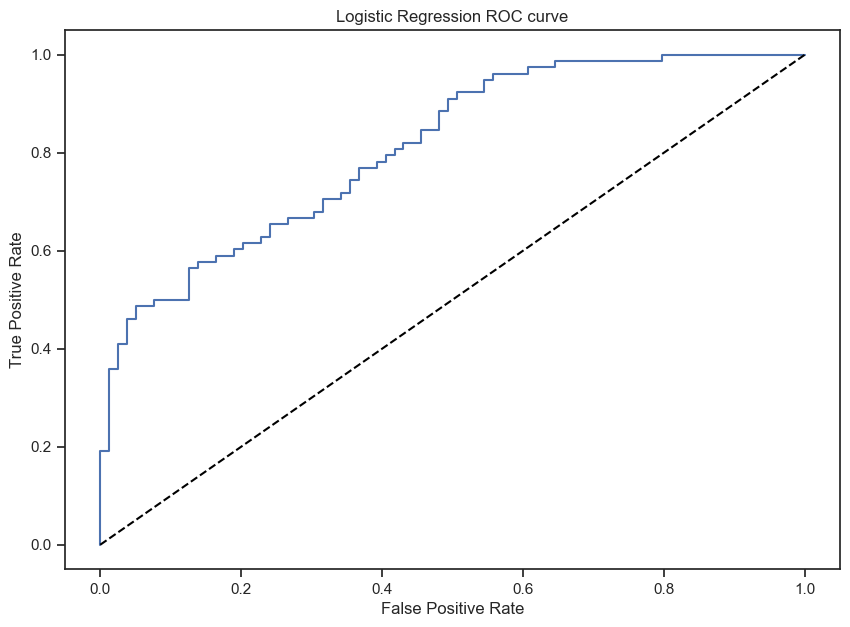

In [ ]:
# plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 2. RandomForest Classifier

### Create the Model

In [ ]:
RF_model= RandomForestClassifier()

### Train the Model

In [ ]:
RF_model= RF_model.fit(X_train, y_train)

### Predict on the test dataset

In [ ]:
rf_pred= RF_model.predict(X_test)
rf_proba= RF_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [ ]:
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)


f2_rf = fbeta_score(y_test, rf_pred, beta=2, average='binary')
print("f2_score :", f2_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)
     

recall_score :  0.9615384615384616
precision_score : 0.7894736842105263
f1_score : 0.8670520231213873
f2_score : 0.9213759213759214
accuracy_score : 0.8535031847133758
ROC_AUC Score: 0.8705432937181665


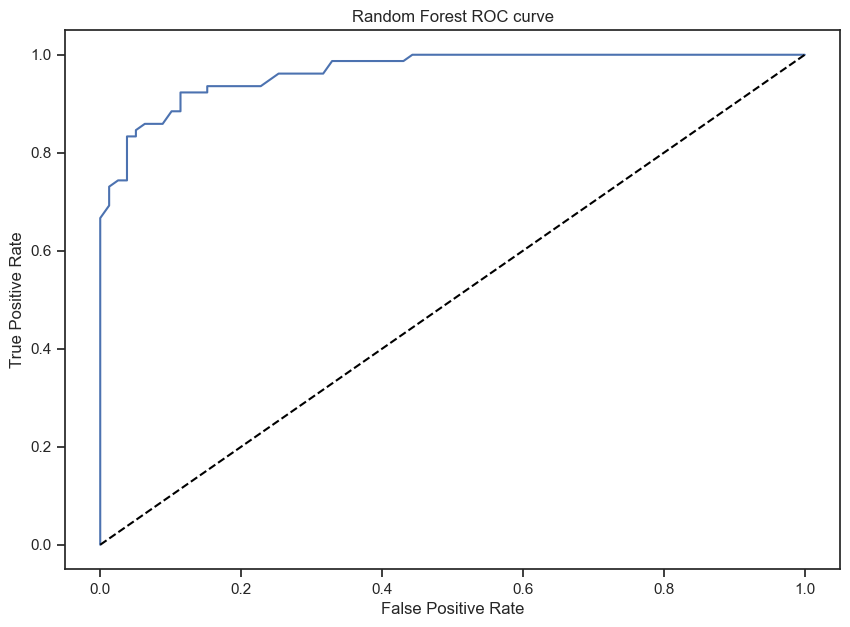

In [ ]:
# plot the model evaluation
fig, ax = plt.subplots(figsize=(10,7))
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 3. XGBoost Classifier

### Create the Model

In [ ]:
XG_model= XGBClassifier()

### Train the Model

In [ ]:
XG_model= XG_model.fit(X_train, y_train)

### Predict on the test dataset

In [ ]:
XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [ ]:
r_XG= recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG= precision_score(y_test, XG_pred)
print("precision_score :",p_XG)

f1_XG= f1_score(y_test, XG_pred)
print("f1_score :", f1_XG)

f2_XG = fbeta_score(y_test, XG_pred, beta=2, average='binary')
print("f2_score :", f2_XG)


A_XG= accuracy_score( y_test, XG_pred)
print("accuracy_score :",A_XG)

acu_XG = roc_auc_score(XG_pred, y_test)
print("ROC_AUC Score:",acu_XG)
     

recall_score :  0.9487179487179487
precision_score : 0.74
f1_score : 0.8314606741573033
f2_score : 0.8980582524271844
accuracy_score : 0.8089171974522293
ROC_AUC Score: 0.8349122807017544


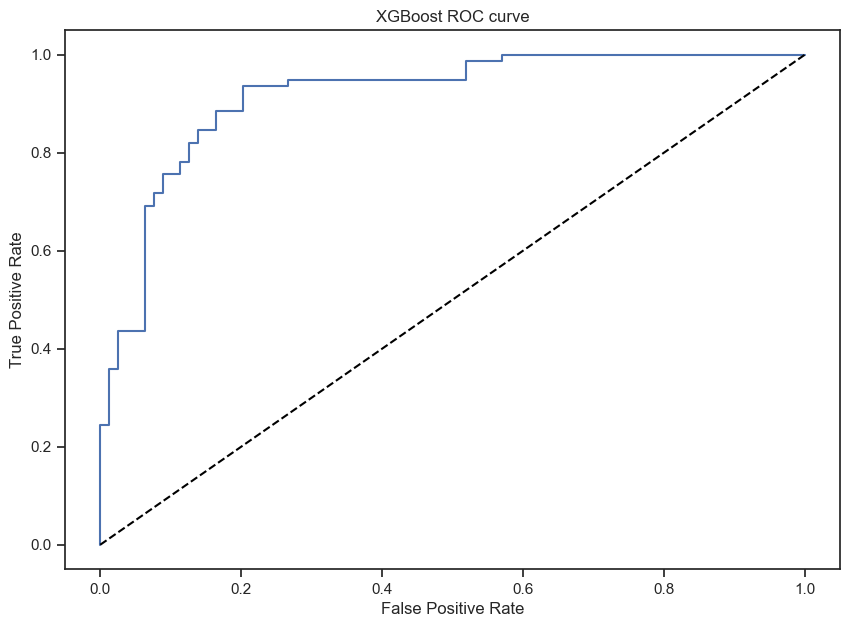

In [ ]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, XG_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 4. K Nearest Neighbors


### Create the Model

In [ ]:
KNN_model = KNeighborsClassifier()


### Train the Model

In [ ]:
KNN_model = KNN_model.fit(X_train, y_train)

### Predict on the test dataset

In [ ]:
KNN_pred = KNN_model.predict(X_test)
KNN_prob = KNN_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [ ]:
r_KNN= recall_score(y_test, KNN_pred)
print("recall_score : ", r_KNN)

p_KNN= precision_score(y_test, KNN_pred)
print("precision_score :",p_KNN)

f1_KNN= f1_score(y_test, KNN_pred)
print("f1_score :", f1_KNN)

f2_KNN = fbeta_score(y_test, KNN_pred, beta=2, average='binary')
print("f2_score :", f2_KNN)


A_KNN= accuracy_score( y_test, KNN_pred)
print("accuracy_score :", A_KNN)

acu_KNN = roc_auc_score(KNN_pred, y_test)
print("ROC_AUC Score:",acu_KNN)

recall_score :  0.8589743589743589
precision_score : 0.7528089887640449
f1_score : 0.8023952095808383
f2_score : 0.8354114713216957
accuracy_score : 0.7898089171974523
ROC_AUC Score: 0.795522141440846


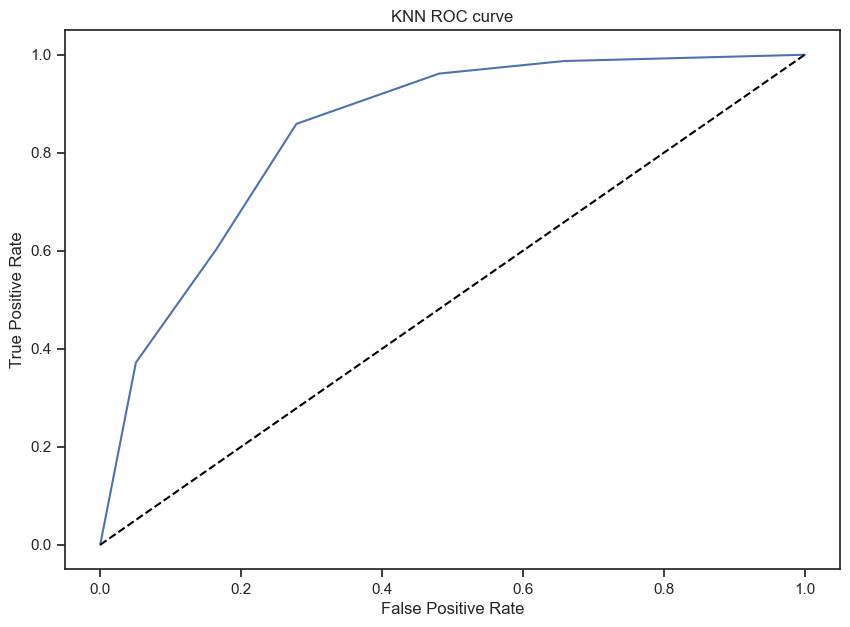

In [ ]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, KNN_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

## 5. Support Vector Machines

### Create the Model

In [ ]:
SVC_model = SVC(kernel='rbf',
                C=51,
                gamma=1,
                probability=True)

### Train the Model

In [ ]:
SVC_model = SVC_model.fit(X_train, y_train)

### Predict on the test dataset

In [ ]:
SVC_pred = SVC_model.predict(X_test)
SVC_prob = SVC_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [ ]:
r_SVC= recall_score(y_test, SVC_pred)
print("recall_score : ", r_SVC)

p_SVC= precision_score(y_test, SVC_pred)
print("precision_score :",p_SVC)

f1_SVC= f1_score(y_test, SVC_pred)
print("f1_score :", f1_SVC)

f2_SVC = fbeta_score(y_test, SVC_pred, beta=2, average='binary')
print("f2_score :", f2_SVC)


A_SVC= accuracy_score( y_test, SVC_pred)
print("accuracy_score :", A_SVC)

acu_SVC = roc_auc_score(SVC_pred, y_test)
print("ROC_AUC Score:",acu_SVC)

recall_score :  0.8589743589743589
precision_score : 0.8072289156626506
f1_score : 0.8322981366459627
f2_score : 0.8481012658227849
accuracy_score : 0.8280254777070064
ROC_AUC Score: 0.829290133507001


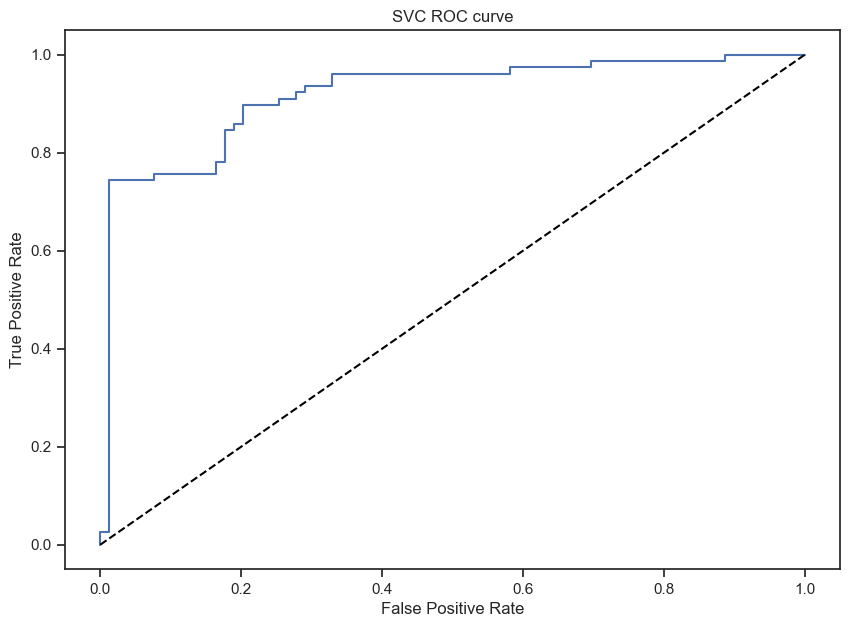

In [ ]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, SVC_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('SVC ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

##  6. DecisionTreeClassifier

### Create the Model

In [ ]:
dtmodel = DecisionTreeClassifier()

### Train the Model

In [ ]:
dtmodel = dtmodel.fit(X_train, y_train)

### Predict on the test dataset

In [ ]:
dt_pred = dtmodel.predict(X_test)
dt_prob = dtmodel.predict_proba(X_test)[:,1]

### Model Evaluation

In [ ]:
r_dt= recall_score(y_test, dt_pred)
print("recall_score : ", r_dt)

p_dt= precision_score(y_test, dt_pred)
print("precision_score :",p_dt)

f1_dt= f1_score(y_test, dt_pred)
print("f1_score :", f1_dt)

f2_dt = fbeta_score(y_test, dt_pred, beta=2, average='binary')
print("f2_score :", f2_dt)


A_dt= accuracy_score( y_test, dt_pred)
print("accuracy_score :", A_dt)

acu_dt = roc_auc_score(dt_pred, y_test)
print("ROC_AUC Score:",acu_dt)

recall_score :  0.8846153846153846
precision_score : 0.7752808988764045
f1_score : 0.8263473053892216
f2_score : 0.8603491271820448
accuracy_score : 0.8152866242038217
ROC_AUC Score: 0.8214639788499669


# Models comparison

In [ ]:
compare_models = ['Logistic Regression','Randomforest','XGBClassifier','K Nearest Neighbors','Support Vector Machines','DecisionTreeClassifier']

data={'Accuracy':[A_lgt,A_rf,A_XG,A_KNN,A_SVC,A_dt],'Recall':[r_lgt,r_rf, r_XG,r_KNN,r_SVC,r_dt],'Precision':[p_lgt, p_rf, p_XG,p_KNN,p_SVC,p_dt], 'f1_score':[f1_lgt, f1_rf, f1_XG,f1_KNN,f1_SVC,f1_dt], 'f2_score':[f2_lgt,f2_rf,f2_XG,f2_KNN,f2_SVC,f2_dt],'ROC_AUC':[acu_lgt, acu_rf, acu_XG,acu_KNN,acu_SVC,acu_dt],'Description':['','best model','','','','']}
result=pd.DataFrame(data=data, index=compare_models)
result

,Accuracy,Recall,Precision,f1_score,f2_score,ROC_AUC,Description
Logistic Regression,0.694268,0.705128,0.687500,0.696203,0.701531,0.694399,
Randomforest,0.853503,0.961538,0.789474,0.867052,0.921376,0.870543,best model
XGBClassifier,0.808917,0.948718,0.740000,0.831461,0.898058,0.834912,
K Nearest Neighbors,0.789809,0.858974,0.752809,0.802395,0.835411,0.795522,
Support Vector Machines,0.828025,0.858974,0.807229,0.832298,0.848101,0.829290,
DecisionTreeClassifier,0.815287,0.884615,0.775281,0.826347,0.860349,0.821464,


After train split test the best model is Randomforest. But that won't be the conclusion for the best model unless after cross validation.

# k-Fold cross validation 

## RandomForest Classifier (Best Model)

In [ ]:
kf_RF = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(RF_model, X_train, y_train, cv=kf_RF, scoring='f1', error_score="raise")
RF_cv_score = score.mean()
RF_cv_stdev = stdev(score)
print('Cross Validation f1 scores are: {}'.format(score))
print('Average Cross Validation f1 score: ', RF_cv_score)
print('Cross Validation f1 standard deviation: ', RF_cv_stdev)

Cross Validation f1 scores are: [0.85517241 0.82442748 0.83185841 0.85496183 0.81818182]
Average Cross Validation f1 score:  0.8369203904063334
Cross Validation f1 standard deviation:  0.017258769701505035


# Model Improvement

# Hyperparameters tuning

# TOP 3 MODELS

1. RandomForerestClassifier
2. Support Vector Machine
3. XGBClassifier



## 1. RandomForest Classifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in tree
max_depth = [2,4,10, None]
 
# minimum number of samples required to split a node
min_samples_split = [2,5]

# minimum number of samples required at each leaf node
min_samples_leaf = [1,2]

# Method of selecting Samples for training each tree
bootstrap = [True]

In [ ]:
# create param grid

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [15, 22, 29, 36, 43, 51, 58, 65, 72, 80], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 10, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True]}


In [ ]:
# make GridSearchCV object
rf_Grid = GridSearchCV(estimator = RF_model, param_grid = param_grid, cv = kf_RF, verbose = 2 , n_jobs = -1, scoring='f1')

In [ ]:
rf_Grid.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 4, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [15, 22, 29, 36, 43, 51, 58, 65, 72,
                                          80]},
             scoring='f1', verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 51}

In [ ]:
RF_model_tuned = RandomForestClassifier(bootstrap = True,
                                    max_depth = 10,
                                    max_features = 'auto',
                                    min_samples_leaf = 1,
                                    min_samples_split =  2,
                                    n_estimators = 51)

In [ ]:
# performance evaluation the test data

RF_model_tuned.fit(X_train, y_train)
y_pred_grid = RF_model_tuned.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84        61
           1       0.97      0.79      0.87        96

    accuracy                           0.86       157
   macro avg       0.86      0.88      0.86       157
weighted avg       0.89      0.86      0.86       157



There is not much difference in the model performance after hyperparameter tuning

In [ ]:
# with open('model.pkl', 'wb') as f:
#     pickle.dump(RF_model_tuned, f)

In [ ]:
# X_new.to_csv('data.csv', index=False)

In [ ]:
# import pickle

# with open('encoder.pkl', 'wb') as f:
#     pickle.dump(encoder, f)

# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(Scaler, f)

# 2. Support Vector Machine

In [ ]:
# create param grid
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]} 

In [ ]:
# make  GridSearchCV object
grid = GridSearchCV(SVC_model,
                    param_grid,
                    cv = kf_RF,
                    refit=True,verbose=2,scoring = 'f1')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(C=51, gamma=1, probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='f1', verbose=2)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.001}

In [ ]:
SVC_model_tuned = SVC(kernel='rbf',
                C=1,
                gamma=0.001,
                probability=True)

In [ ]:
# performance evaluation the test data

SVC_model_tuned.fit(X_train, y_train)
y_pred_grid = SVC_model_tuned.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69        63
           1       0.82      0.68      0.74        94

    accuracy                           0.72       157
   macro avg       0.72      0.73      0.72       157
weighted avg       0.74      0.72      0.72       157



There is not much difference in the model performance after hyperparameter tuning

# 3. XGBClassifier

In [ ]:
# depth = np.arange(1,50)
# leaves = [1,2,4,5,10,20,30,40,80,150]

In [ ]:
# # create the parameter grid

# params = {
#           'max_depth':depth,
#           'min_samples_leaf':leaves,
#           'min_samples_split':[2,3,4,5],
#           'criterion':['gini','entropy'] 
# }

In [ ]:
# # make  GridSearchCV object
# grid_search = GridSearchCV(estimator = dtmodel, 
#                            param_grid = params, 
#                            cv = kf_dt, verbose = 1, scoring = 'f1', n_jobs = -1)

In [ ]:
# grid_search.fit(X_train,y_train)

In [ ]:
# score = pd.DataFrame(grid_search.cv_results_)
# score

In [ ]:
# grid_search.best_params_

In [ ]:
# grid_search.best_estimator_

In [ ]:
# dt = DecisionTreeClassifier(criterion='entropy', max_depth=36, min_samples_leaf=1,
#                        min_samples_split=2)

In [ ]:
# # performance evaluation on test data
# dt.fit(X_train, y_train)
# y_pred_grid_dt = dt.predict(X_test)
# print(classification_report(y_pred_grid, y_test))

There is a difference in the model performance after hyperparameter tuning. The model F1 score increased after tuning

# Using Confusion Matrix For Predictions


# TOP 3 MODELS

1. RandomForerestClassifier
2. Support Vector Machine
3. DecisionTree Classifier



# 1. RandomForerestClassifier

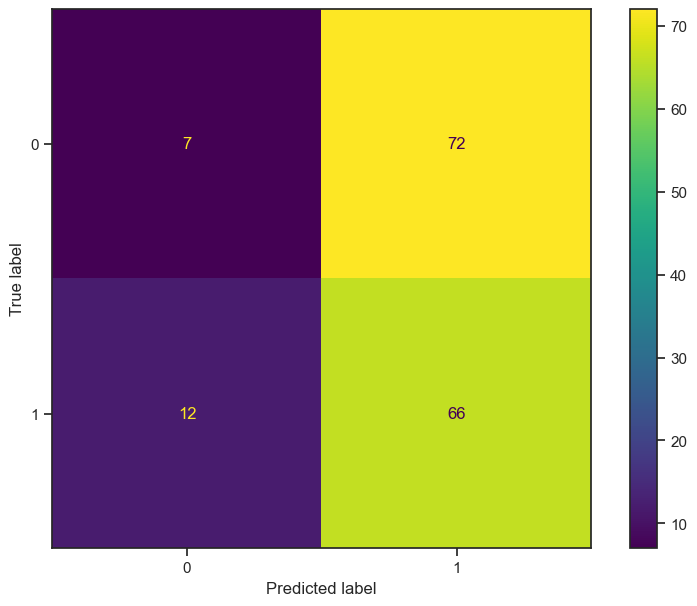

In [ ]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(10,7))
y_pred_RF = rf_Grid.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RF, labels=rf_Grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_Grid.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Based on confusion matrix:

1. We successfully predicted 869 customers who don't churn and 976 who churn
2. There are 167 customers who are predicted to churn when they actually won't
3. There are 50 customers who are predicted to not churn when they actually churn

# 2. Support Vector Machine

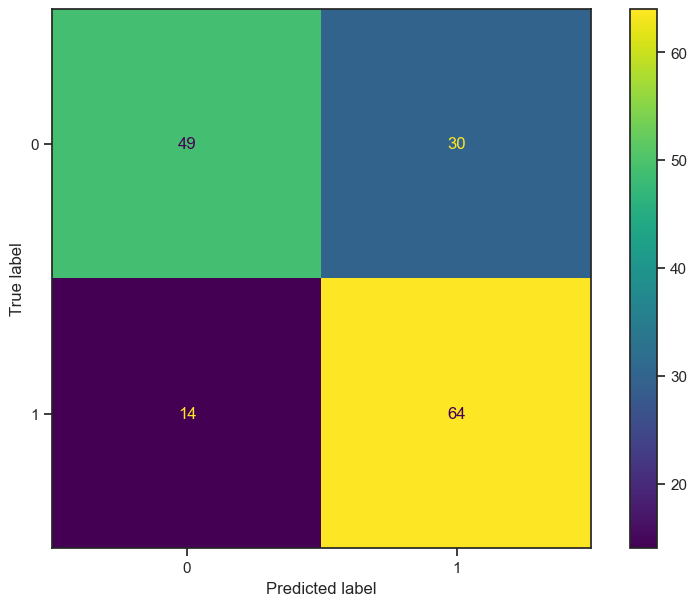

In [ ]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(10,7))
y_pred_SVC = grid.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVC, labels=grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Based on confusion matrix:

1. We successfully predicted 881 customers who don't churn and 947 who churn
2. There are 155 customers who are predicted to churn when they actually won't
3. There are 79 customers who are predicted to not churn when they actually churn

# 3. DecisionTree Classifier

NameError: name 'grid_search' is not defined

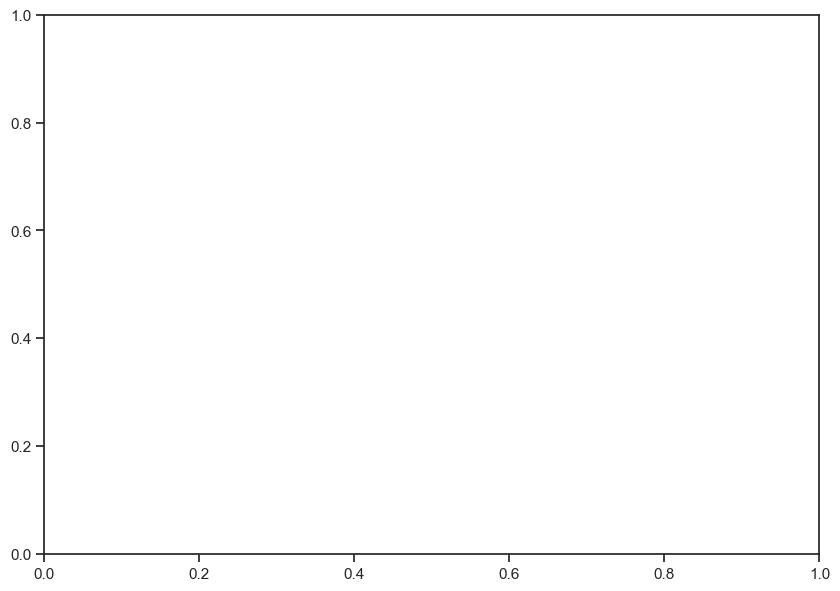

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred_dt = grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_dt, labels=grid_search.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_search.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Based on confusion matrix:

1. We successfully predicted 801 customers who don't churn and 962 who churn
2. There are 235 customers who are predicted to churn when they actually won't
3. There are 64 customers who are predicted to not churn when they actually churn

# Feature Importance

# 1.  RandomforestClassifier 

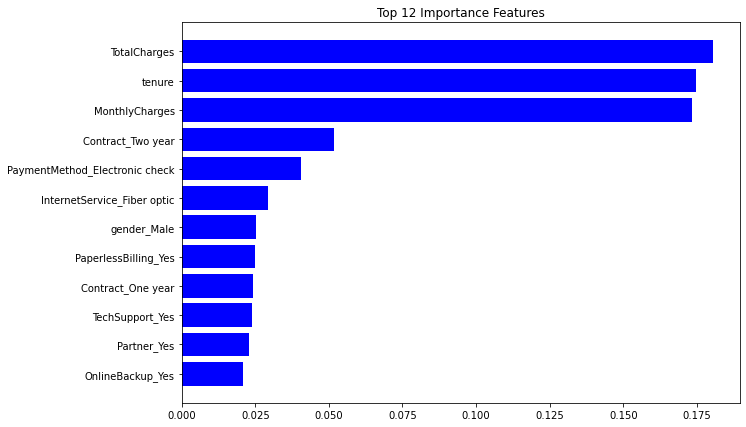

In [ ]:
coeffs = RF_model_tuned.feature_importances_
list_of_coeffs = list(sorted(zip(coeffs, X_train.columns), reverse=True))
x_val = [x[0] for x in list_of_coeffs[:12]]
y_val = [x[1] for x in list_of_coeffs[:12]]

#create figure
plt.figure(figsize=(10,7))
plt.barh( y_val, x_val, align='center', color='blue')
plt.title('Top 12 Importance Features')
plt.gca().invert_yaxis() # first with higest contributed one 
plt.show()

# 2.  DecisionTreeClassifier

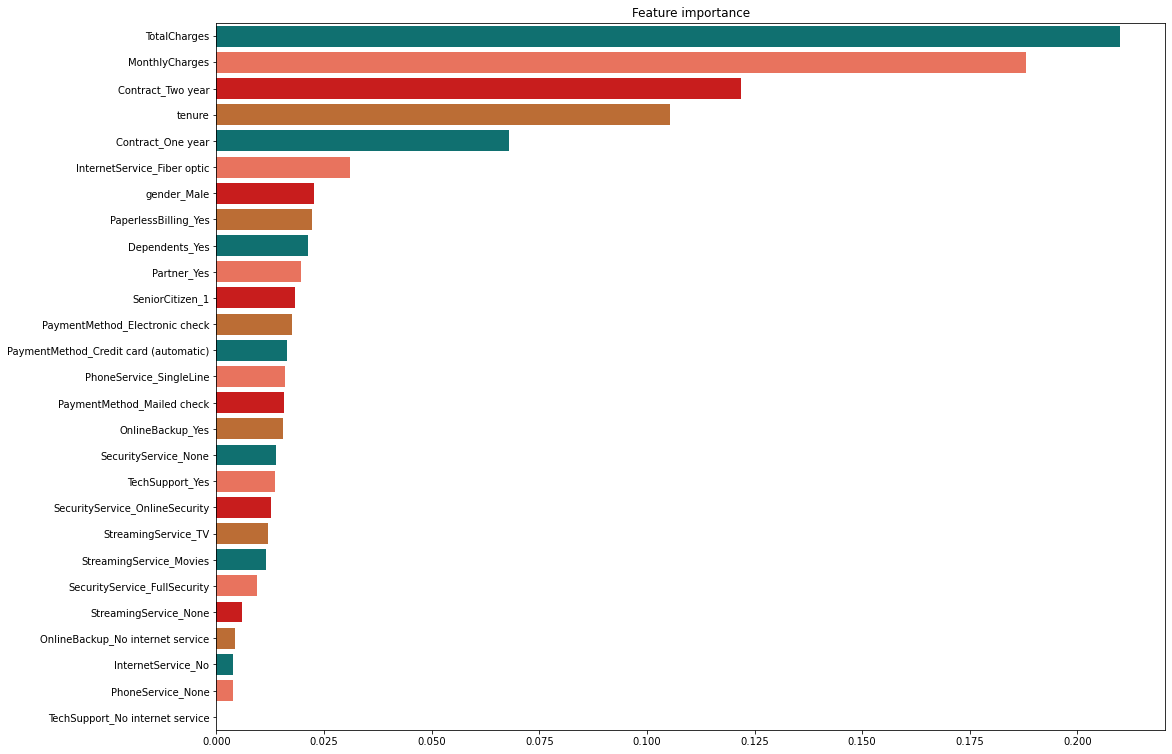

In [ ]:
fimp = pd.Series(data=dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')


# Conclusion

Looking at model results, the best Precision on the test set is achieved by  RandomForest Classifier with 0.89 . 

Given the high imbalance of the data towards non-churners, it makes sense to compare F1 scores to get the model with the best 

score on jointly precision and recall. This would also be the  RandomForest Classifier with a F1 score of 0.90 .

Given the scores of the best performing models, it can be observed that F1 scores are not much above 90%. 

Further optimization efforts should be carried out to achieve a higher scores and thereby increase prediction power for more 

business value.

When we consider the Exploratory Data Analysis we did, it is clear that this company has some issue with their Month-to-month

customers.

What kind of incentives can this company offer to customers to get them to sign One-year or Two-year contracts?

What adjustments can be made to Month-to-Month contracts that would be more favorable to customers, without taking away the

appeal of a One-year or Two-year contract?

For RandomForest Classifier, you can see TotalCharges has a positive influence on the data and some features like

InternetService_fibreoptics,contract_one year and etc should be examine critically since it has negative impact on the target column.

 Recommendation and Request

We should pay more attention to customers who meet the criteria below

1. Contract: Month-to-month
2. Tenure: Short tenure
3. Internet service: Fiber optic
4. Payment method: Electronic check